# Python и машинное обучение
*I уровень - базовый*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
girls_data = pd.read_csv("Girls.csv", encoding='Windows-1251', sep=';')
girls_data.drop('ID', axis=1, inplace=True)

boys_data = pd.read_csv("Boys.csv", encoding='Windows-1251', sep=';', header=0)
boys_data.drop('ID', axis=1, inplace=True)

In [3]:
girls_data.head(3)

,Name,NumberOfPersons,global_id,Year,Month,Unnamed: 6
0,Мария,252,37750254,2015,январь,NaN
1,Анастасия,224,37750255,2015,январь,NaN
2,Анна,190,37750256,2015,январь,NaN


In [4]:
boys_data.head(3)

,Name,NumberOfPersons,global_id,Year,Month,Unnamed: 6
0,Александр,253,37750243,2015,январь,NaN
1,Михаил,247,37750244,2015,январь,NaN
2,Иван,226,37750245,2015,январь,NaN


In [5]:
from collections import Counter

def get_names_last_letters(names, letter_num=2):
    name_variants = []

    for name in names:
        if name == 'Name':
            continue
        if ',' in name:
            name_variants += list(map(lambda x: str(x).rstrip(), name.split(', ')))
            continue
        name_variants.append(name.lower())
        
    last_letters = list(map(lambda x: x[-letter_num:] , name_variants))
    last_letters_freequency = dict(Counter(last_letters))
    return last_letters_freequency

Посмотрим на самые частые окончания в мужских именах

<BarContainer object of 62 artists>

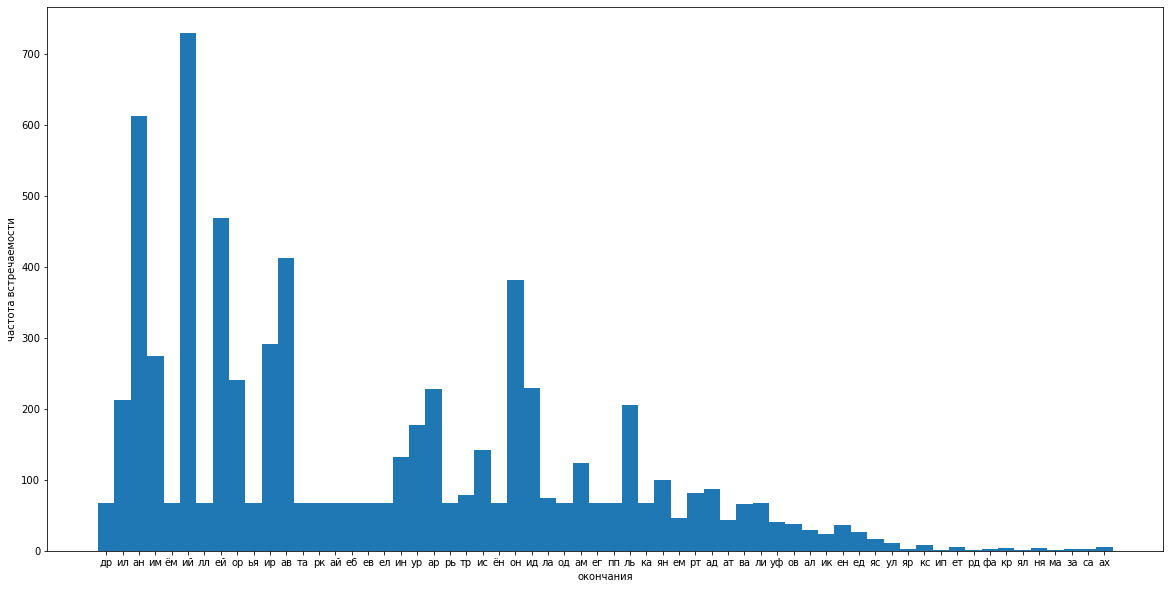

In [17]:
boys_names_last_letters = get_names_last_letters(boys_data['Name'], letter_num=2)
plt.figure(figsize=(20,10))
plt.xlabel('окончания')
plt.ylabel('частота встречаемости')
plt.bar(boys_names_last_letters.keys(), boys_names_last_letters.values(), width=1)

Повторим для женских имен

<BarContainer object of 37 artists>

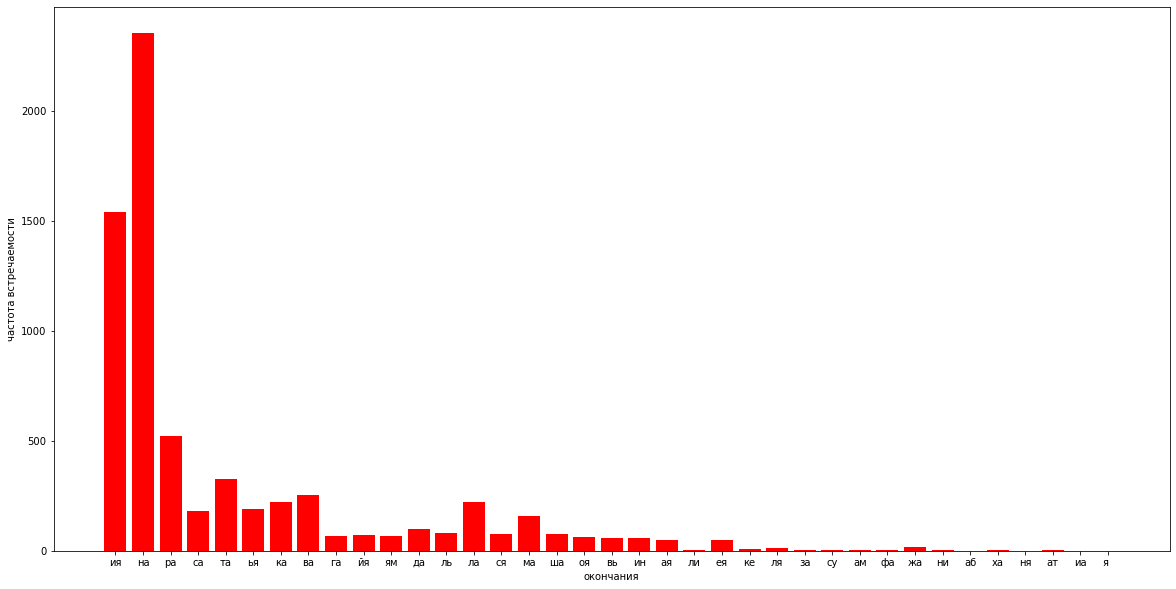

In [19]:
girls_names_last_letters = get_names_last_letters(girls_data['Name'], letter_num=2)
plt.figure(figsize=(20,10))
plt.xlabel('окончания')
plt.ylabel('частота встречаемости')
plt.bar(girls_names_last_letters.keys(), girls_names_last_letters.values(), color='red')

у мужчин разнообразие окончаний имен было больше :)

Изменив количество последних букв имен (параметр letter_num функции get_names_last_letters), пришел к выводу, что **определять пол по 2 последним буквам имени оптимально** (почему? см. конец файла)

In [8]:
len(girls_names_last_letters), len(boys_names_last_letters)

(37, 62)

In [9]:
class LastNameLetters:
    def __init__(self, is_male, letters, freequency):
        self.is_male = is_male
        self.letters = letters
        self.freequency = freequency
    
    def __repr__(self):
        return 'Male' if self.is_male else 'Female'

In [10]:
is_male_by_last_symbols = {}

for letters, freequency in girls_names_last_letters.items():
    is_male_by_last_symbols[letters] = LastNameLetters(False, letters, freequency)

appended_word_endings = is_male_by_last_symbols.keys()

for letters, freequency in boys_names_last_letters.items():
    nameLetters = LastNameLetters(True, letters, freequency)
    
    if letters in appended_word_endings:
        if is_male_by_last_symbols[letters].freequency <= freequency:
            is_male_by_last_symbols[letters] = nameLetters
        continue
        
    is_male_by_last_symbols[letters] = LastNameLetters(True, letters, freequency)

In [11]:
def is_male(name):
    letters = name[-2:].lower()
    assert letters in is_male_by_last_symbols.keys(), f'Letters {letters} not found in dataset'
    return is_male_by_last_symbols[letters].is_male

In [12]:
error = 0

for name in set(girls_data['Name']):
    if name != 'Name' and is_male(name):
        error += 1
        
for name in set(boys_data['Name']):
    if name != 'Name' and not is_male(name):
        error += 1
        
print('\n', round(error / (len(set(boys_data['Name']))+len(set(girls_data['Name']))), 2))


 0.05


Если мы будем определять пол по 3 буквам, то ошибка незначительно упадет, по сравнению с 2 последними буквами.
Я считаю, что, используя последние 3 буквы, мы переобучаемся и не сможем распознавать пол правильно у новых, необычных имен.
А только последней буквы имени (в большинстве случаев) не хватает для определения пола.


In [13]:
def appeal_pick_up(name):
    return "{} {}".format('Уважаемый' if is_male(name) else 'Уважаемая', name)

In [14]:
appeal_pick_up('Мария')

'Уважаемая Мария'